In [133]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import pyregion
import glob
import re
from utils import *
from pipeline import *

In [134]:
name = "A2390C"
Tab_SE = Table.read("./%s/SE/%s_run3.cat"%(name, name),format="ascii.sextractor")
Datacube = Read_Datacube("/home/qliu/data/A2390C_cube.fits", name="A2390C", z0=0.228, SE_catalog="./A2390C/SE/A2390C_run3.cat")
Datacube.read_mask('/home/qliu/data/Raw_stack_A2390C_mask.fits')
Datacube.read_seg('./A2390C/SE/segment_run3.fits')
Datacube.read_spec('./A2390C/A2390C-spec_v3.fits')
# Datacube.read_cc('./A2390C/A2390C-cc.fits')
el_ls_v = glob.glob("./%s/fig/candidate_v3/visual/*.png"%name)
Num_v = np.sort(np.array([re.compile(r'\d+').findall(el)[-1] for el in el_ls_v]).astype("int"))
print(Num_v)
ind_v = Num_v - 1

[  14   34  100  114  167  224  227  267  285  313  325  335  374  375
  381  397  463  518  558  574  583  589  600  607  633  646  651  684
  711  738  751  781  791  831  881  901  919  934  946  979 1051 1082
 1111 1169 1212 1222 1241 1256 1259 1263 1272 1279 1297 1315 1317 1319
 1323 1347 1363 1371 1387 1390 1392 1403 1406 1445 1456 1469 1495 1501
 1504 1510 1555 1609 1625 1630 1638 1668 1686 1697 1712 1713 1715 1726
 1728 1732 1738 1758 1776 1810 1858 1870 1877 1906 1920 1926 1930 1984
 2047 2066 2114 2136 2153 2159 2166 2174]


In [152]:
name = "A2465C"
Tab_SE = Table.read("./%s/SE/%s_run2.cat"%(name, name),format="ascii.sextractor")
Datacube = Read_Datacube("/home/qliu/data/A2465C_cube.fits", name="A2465C", z0=0.245, 
                         SE_catalog="./A2465C/SE/A2465C_run2.cat")
Datacube.read_mask('/home/qliu/data/Raw_stack_A2465C_mask.fits')
# Datacube.read_seg('./A2390C/SE/segment_run3.fits')
# Datacube.read_spec('./A2390C/A2390C-spec_v3.fits')
# Datacube.read_cc('./A2390C/A2390C-cc.fits')
el_ls_v = glob.glob("./A2465C/fig/candidate_v2/visual/*.png")
Num_v = np.sort(np.array([re.compile(r'\d+').findall(el)[-1] for el in el_ls_v]).astype("int"))
print(Num_v)
ind_v = Num_v - 1

[  13   15   34   76   80  134  141  151  195  216  221  229  240  257
  259  264  274  276  301  305  313  343  354  364  400  423  455  468
  472  475  476  479  489  490  499  501  503  505  512  515  517  526
  533  537  538  541  544  548  552  555  560  564  569  577  585  588
  589  601  602  605  609  610  620  628  647  685  692  709  732  736
  749  752  755  756  795  908  946  947  966  973 1013 1053 1054 1067
 1075 1077 1084 1086 1100 1104 1110 1129 1136 1140 1150 1151 1158 1163
 1191 1200 1202]


In [153]:
Tab_EL = Tab_SE[ind_v]
Pos_candidate = np.array([(x,y) for (x,y) in zip(Tab_EL["X_IMAGE"], Tab_EL["Y_IMAGE"])])

In [154]:
region_str = "\n".join(["circle(%.4f,%.4f,%.3f) # color=cyan"%(gal["X_IMAGE"],gal["Y_IMAGE"],4*np.max([gal["A_IMAGE"],1])) for gal in Tab_EL])
region_str = "# Region file format: DS9 version 4.1\nglobal color=cyan dashlist=8 3 width=1\nimage\n"+region_str

In [155]:
regs = pyregion.parse(region_str)
# regs.write('./%s/%s_emission_Liu_visual.reg'%(name, name))
regs

[Shape : circle ( Number(72.9398),Number(44.6074),Number(10.344) ),
 Shape : circle ( Number(1168.9402),Number(43.4020),Number(8.552) ),
 Shape : circle ( Number(1953.3197),Number(93.3952),Number(9.040) ),
 Shape : circle ( Number(866.7593),Number(157.4671),Number(9.520) ),
 Shape : circle ( Number(1398.5040),Number(171.7252),Number(9.352) ),
 Shape : circle ( Number(1919.1405),Number(227.2834),Number(6.116) ),
 Shape : circle ( Number(1443.5079),Number(256.9049),Number(11.200) ),
 Shape : circle ( Number(1565.0320),Number(261.6831),Number(8.136) ),
 Shape : circle ( Number(1054.1056),Number(324.5355),Number(7.504) ),
 Shape : circle ( Number(1967.7163),Number(399.8188),Number(14.860) ),
 Shape : circle ( Number(1003.8782),Number(373.3615),Number(6.556) ),
 Shape : circle ( Number(1398.6667),Number(397.2325),Number(10.344) ),
 Shape : circle ( Number(586.3766),Number(465.3435),Number(13.676) ),
 Shape : circle ( Number(1213.1095),Number(479.0815),Number(11.832) ),
 Shape : circle ( Num

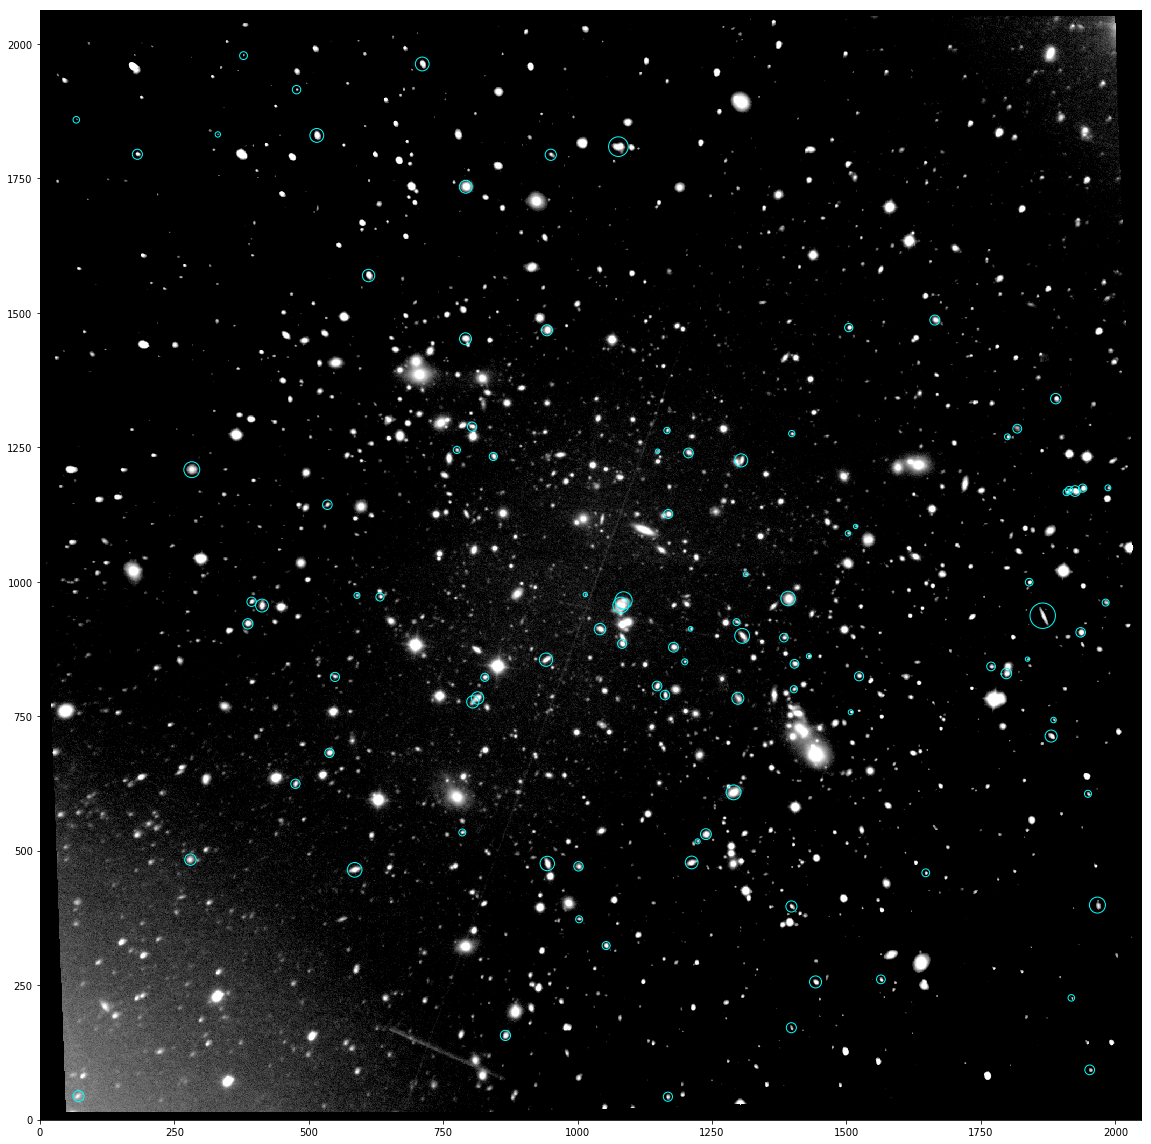

In [161]:
# hdu_field = fits.open('/home/qliu/data/%s_stack.fits'%name)
hdu_field = fits.open('/home/qliu/data/2345354v.fits')

stack_field = hdu_field[0].data
plt.figure(figsize=(16,16))
ax = plt.subplot(111)
# ax.imshow(stack_field,vmin=-0.1,vmax=1,norm=norm, origin="lower",cmap="gray")
ax.imshow(stack_field,vmin=np.median(stack_field)+4,vmax=450,norm=norm, origin="lower",cmap="gray")

patch_list, artist_list = regs.get_mpl_patches_texts()
for p in patch_list:
    ax.add_patch(p)
plt.tight_layout()
# plt.savefig("/home/qliu/Pictures/A2465C_ELG_deep.pdf",dpi=300)

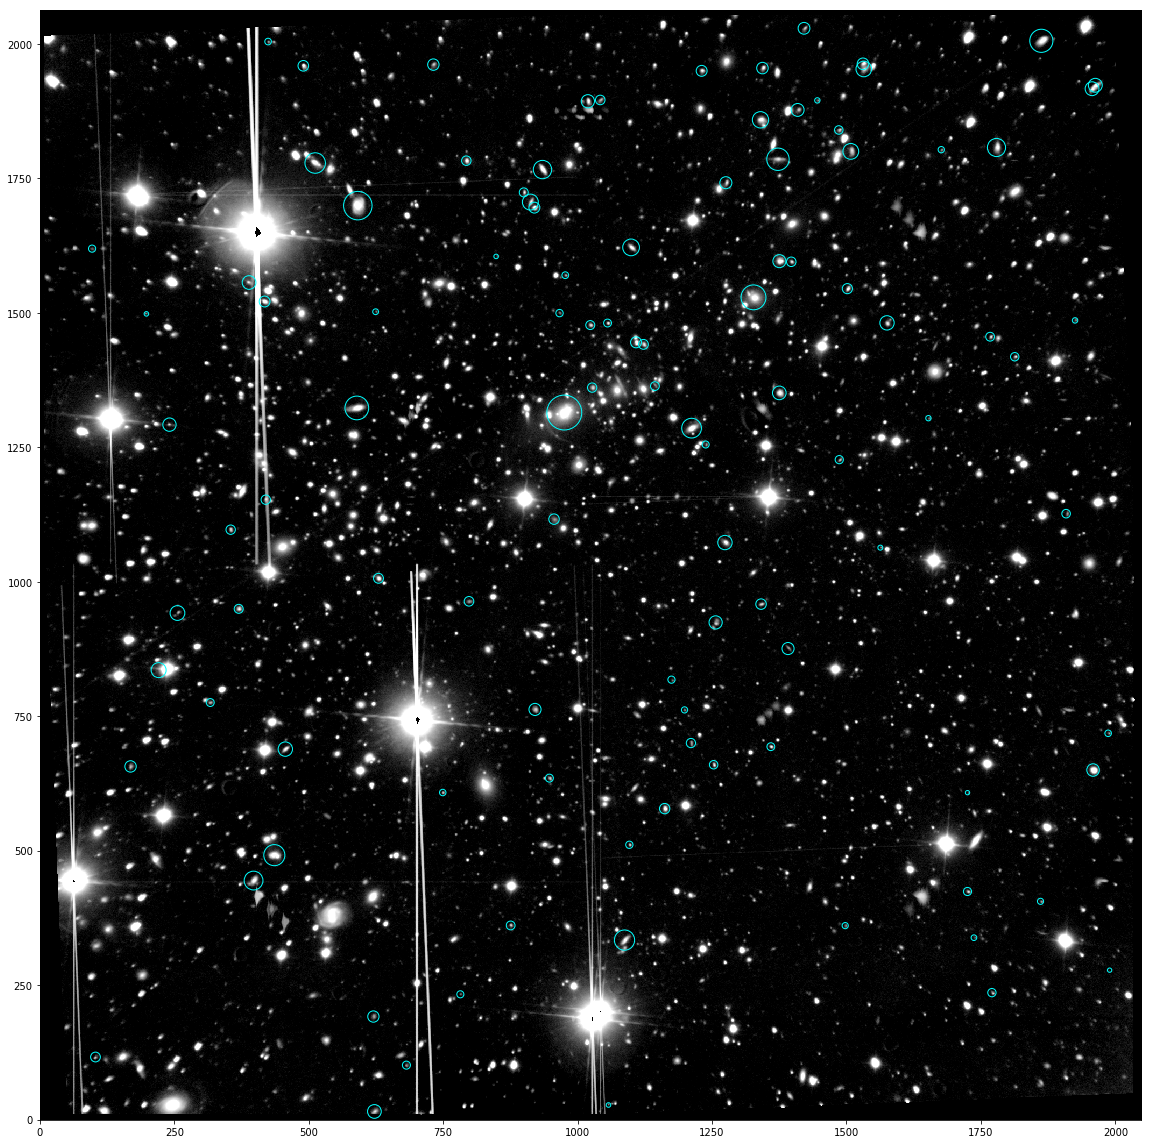

In [150]:
# hdu_field = fits.open('/home/qliu/data/%s_stack.fits'%name)
hdu_field = fits.open("/home/qliu/data/A2390deep_bgsub.fits")

stack_field = hdu_field[0].data
plt.figure(figsize=(16,16))
ax = plt.subplot(111)
# ax.imshow(stack_field,vmin=-0.1,vmax=1,norm=norm, origin="lower",cmap="gray")
ax.imshow(stack_field,vmin=np.median(stack_field),vmax=200,norm=norm, origin="lower",cmap="gray")

patch_list, artist_list = regs.get_mpl_patches_texts()
for p in patch_list:
    ax.add_patch(p)
plt.tight_layout()
plt.savefig("/home/qliu/Pictures/A2390C_ELG_deep.pdf",dpi=300)

KeyboardInterrupt: 

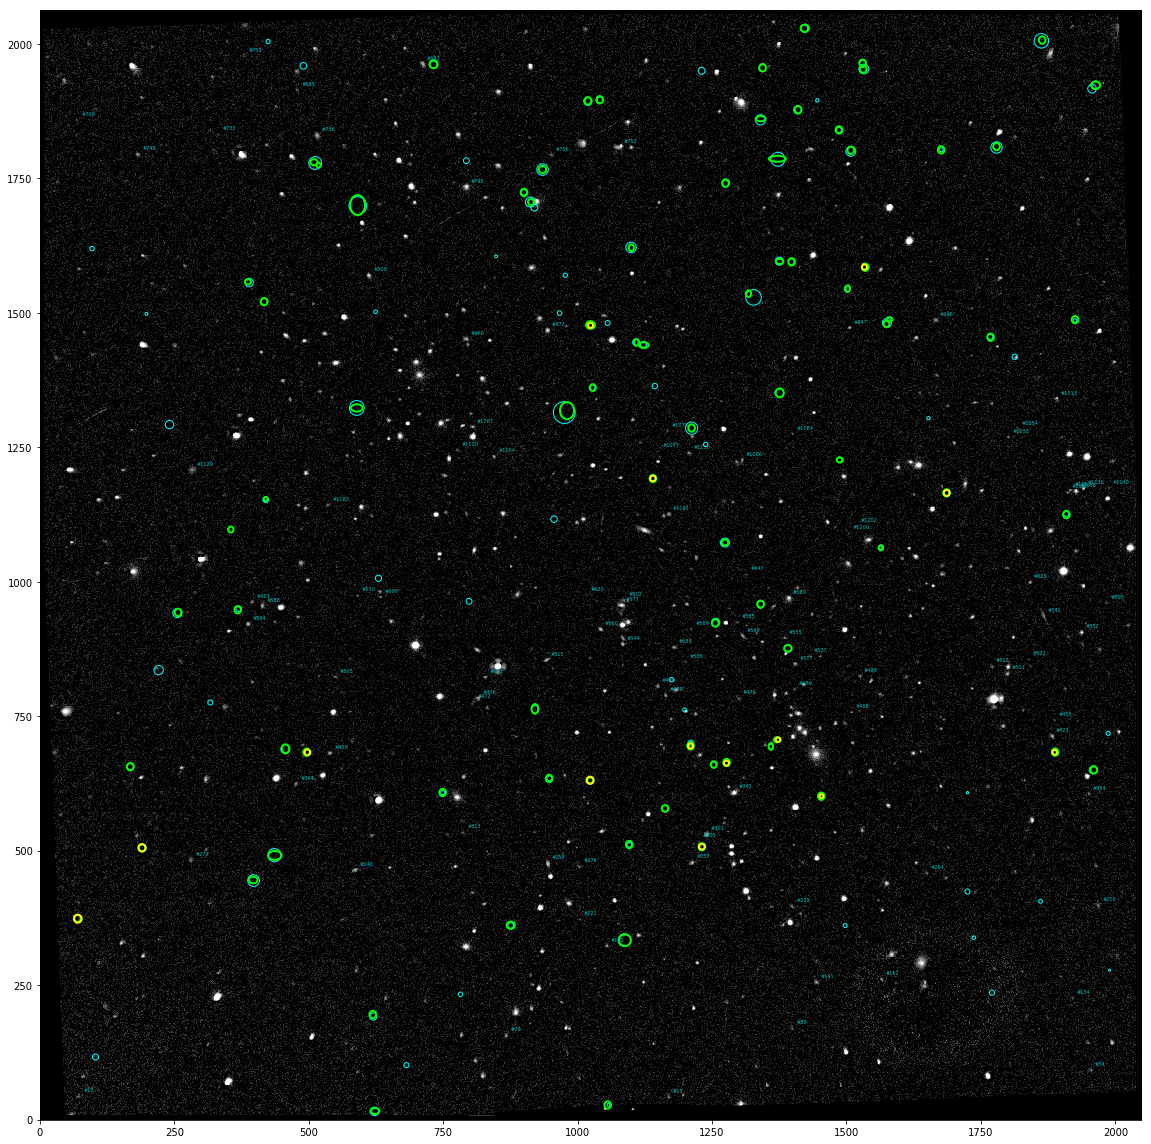

In [45]:
plt.figure(figsize=(16,16))
ax = plt.subplot(111)
ax.imshow(stack_field,vmin=0.001,vmax=10,norm=norm, origin="lower",cmap="gray")

regs_comp = pyregion.open("./A2390C/A2390C_Compare.reg")
patch_list, _ = regs_comp.get_mpl_patches_texts()
for p in patch_list:
    ax.add_patch(p)
    
for num, pos in zip(Num_v, Pos_candidate):
    ax.text(pos[0]+8, pos[1]+8, "#%d"%num, color="c", fontsize=5, alpha=1.0, zorder=3)

plt.tight_layout()

plt.savefig("/home/qliu/Pictures/A2390C_ELG_compare.pdf",dpi=300)